In [ ]:
import pandas as pd
import numpy as np

In [ ]:
## pull in data
data = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
data.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [ ]:
data.shape

(37249, 2)

In [ ]:
data.sample()['clean_comment'].values

array([' the rich will pay whatever they have pay get away the middle class will looted and the poor class collateral damage this guy gets correctly '],
      dtype=object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [ ]:
data.isnull().sum()

,0
clean_comment,100
category,0


In [ ]:
data[data['clean_comment'].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.duplicated().sum()

np.int64(350)

In [ ]:
data[data.duplicated()]

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
36915,who won,0
37044,,0
37125,hari,0
37158,top kek,1


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data[(data['clean_comment'].str.strip() == '')]

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [ ]:
data = data[~(data['clean_comment'].str.strip() == '')]


In [ ]:
data['clean_comment'] = data['clean_comment'].str.lower()
data.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [ ]:
## get rid of space at the front and end of words
data[data['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]


,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [ ]:
# Remove trailing and leading whitespaces from the 'clean_comment' column
data['clean_comment'] = data['clean_comment'].str.strip()

# Verify the transformation by checking for any remaining trailing whitespaces
data['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' ')).sum()

np.int64(0)

In [ ]:
## identify the comments that have urls in them
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_urls = data[data['clean_comment'].str.contains(url_pattern, regex = True)]
comments_with_urls

,clean_comment,category


In [ ]:
## check for newlines in code
comments_with_newline = data[data['clean_comment'].str.contains('\n')]
comments_with_newline.head()


,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1


In [ ]:
## remove new lines
data['clean_comment'] = data['clean_comment'].str.replace('\n', ' ', regex=True)
data[data['clean_comment'].str.contains('\n')].head()

,clean_comment,category


EDA

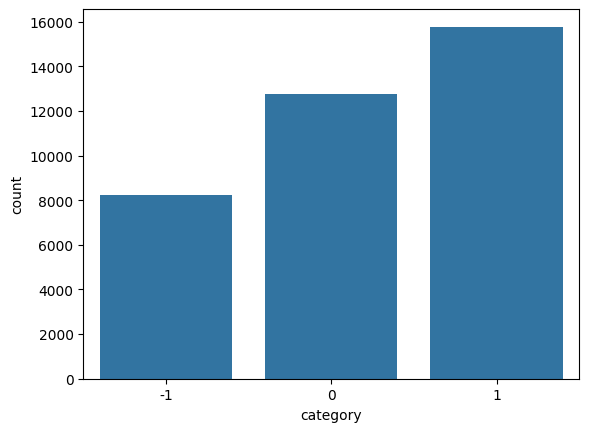

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.countplot(data = data, x = 'category')
plt.show()

In [ ]:
data['category'].value_counts(normalize=True)

,proportion
category,
1,0.428641
0,0.347131
-1,0.224227


In [ ]:
data['word_count'] = data['clean_comment'].apply(lambda x: len(x.split()))

In [ ]:
data.sample(5)

,clean_comment,category,word_count
29649,jesus christ hours the handwara gunfight anoth...,1,25
369,typical modi fan advising escapism,-1,5
19853,attendance must necessary college walo leni ka...,0,13
29926,randia,0,1
3510,hey that suit yeah don see your name well shit,-1,10


In [ ]:
data['word_count'].describe()

,word_count
count,36793.000000
mean,29.667464
std,56.790738
min,1.000000
25%,6.000000
50%,13.000000
75%,30.000000
max,1307.000000


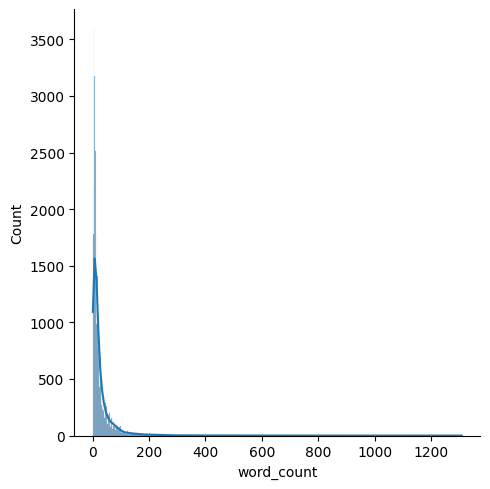

In [ ]:
sns.displot(data['word_count'], kde=True)
plt.show()

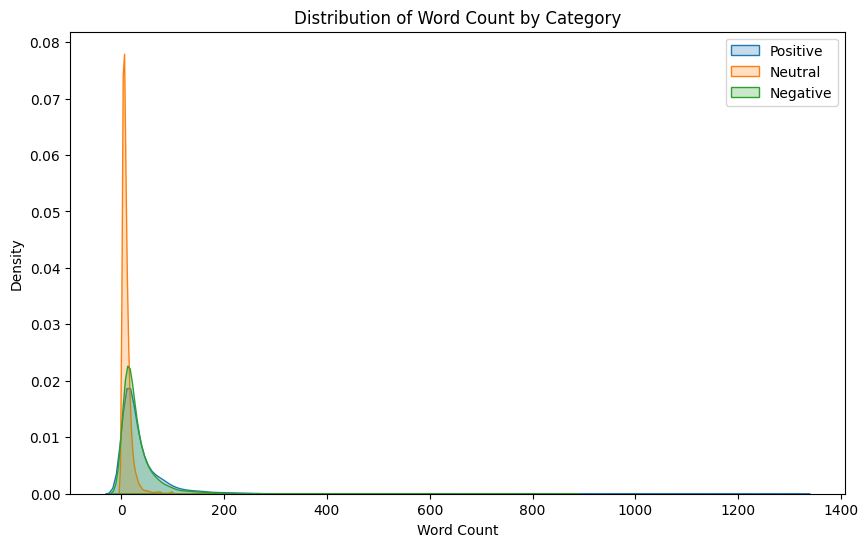

In [ ]:
plt.figure(figsize=(10, 6))

##plot kde for category 1
sns.kdeplot(data[data['category'] == 1]['word_count'], label='Positive', fill=True)

##plot kde for category 0
sns.kdeplot(data[data['category'] == 0]['word_count'], label='Neutral', fill=True)

## plot kde for category -1
sns.kdeplot(data[data['category'] == -1]['word_count'], label='Negative', fill=True)

plt.title('Distribution of Word Count by Category')
plt.xlabel('Word Count')
plt.ylabel('Density')
plt.legend()
plt.show()

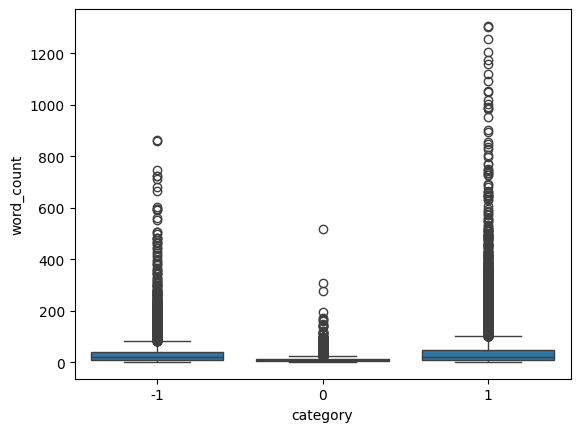

In [ ]:
sns.boxplot(data=data, x='category', y='word_count')
plt.show()

Text(0, 0.5, 'Score')

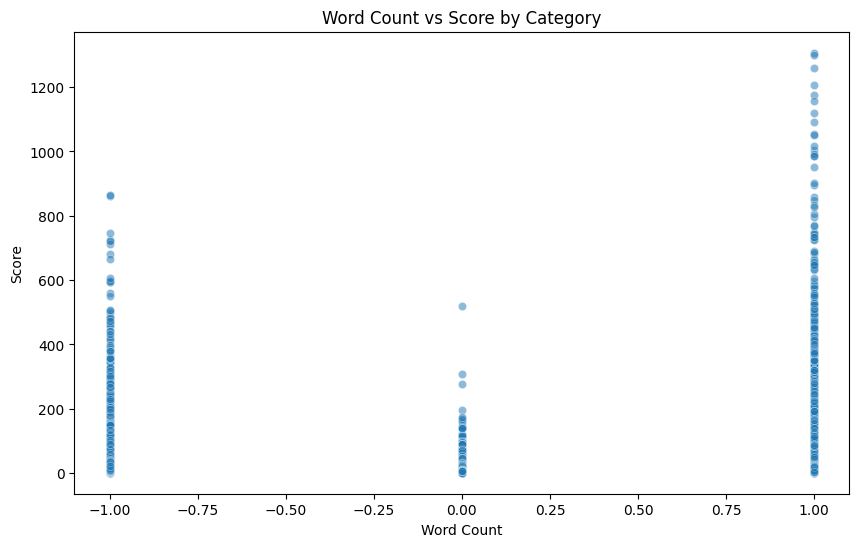

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='category', y='word_count', alpha=0.5)
plt.title('Word Count vs Score by Category')
plt.xlabel('Word Count')
plt.ylabel('Score')

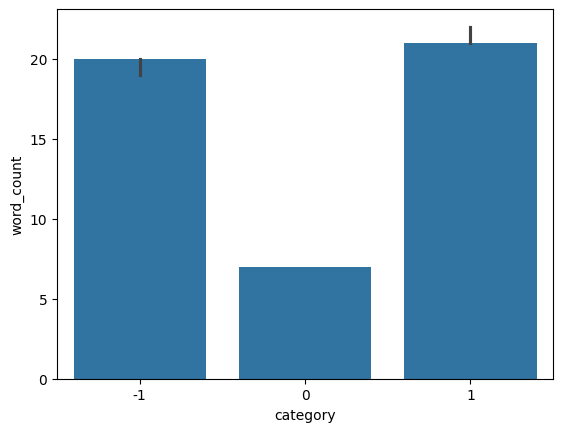

In [ ]:
sns.barplot(data, x='category', y='word_count', estimator ='median')
plt.show()

In [ ]:
!pip install nltk

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
#NOTE: stop words are common words that dont provide value in sentence. e.g "a"
stop_words = set(stopwords.words('english'))

data['num_stopwords'] = data['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data.sample(5)

,clean_comment,category,word_count,num_stopwords
13284,damn bjp pls discipline your asshole netas won...,1,29,10
35940,wwhat power does the have his regard can they ...,-1,15,7
27624,hell using audio dac with pair 58x and can dea...,1,37,12
11977,thanks for the list,1,4,2
26614,perfectly rational statement from man who neve...,1,13,4


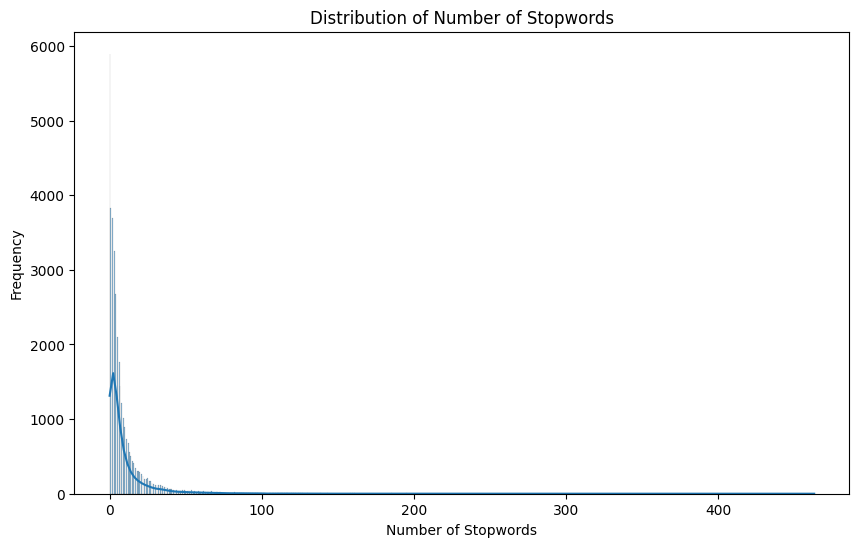

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['num_stopwords'], kde=True)
plt.title('Distribution of Number of Stopwords')
plt.xlabel('Number of Stopwords')
plt.ylabel('Frequency')
plt.show()


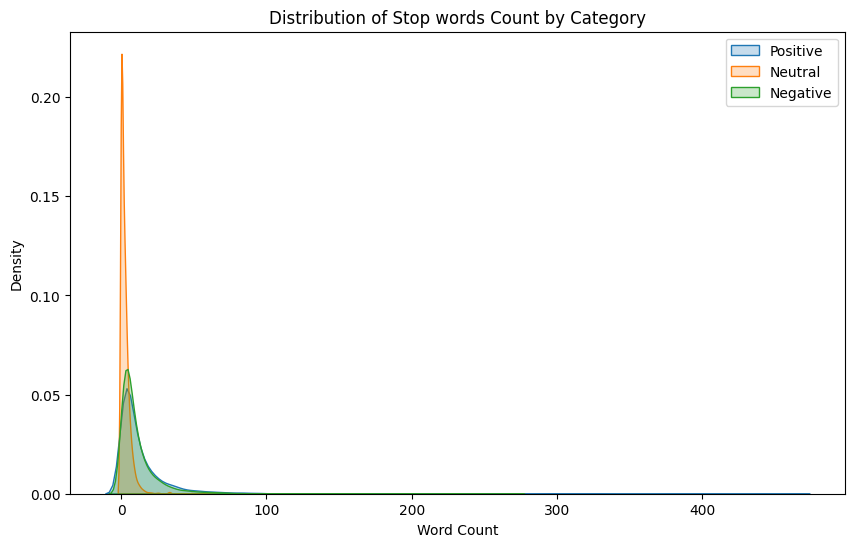

In [ ]:
plt.figure(figsize=(10, 6))

##plot kde for category 1
sns.kdeplot(data[data['category'] == 1]['num_stopwords'], label='Positive', fill=True)

##plot kde for category 0
sns.kdeplot(data[data['category'] == 0]['num_stopwords'], label='Neutral', fill=True)

## plot kde for category -1
sns.kdeplot(data[data['category'] == -1]['num_stopwords'], label='Negative', fill=True)

plt.title('Distribution of Stop words Count by Category')
plt.xlabel('Word Count')
plt.ylabel('Density')
plt.legend()

Text(0, 0.5, 'Frequency')

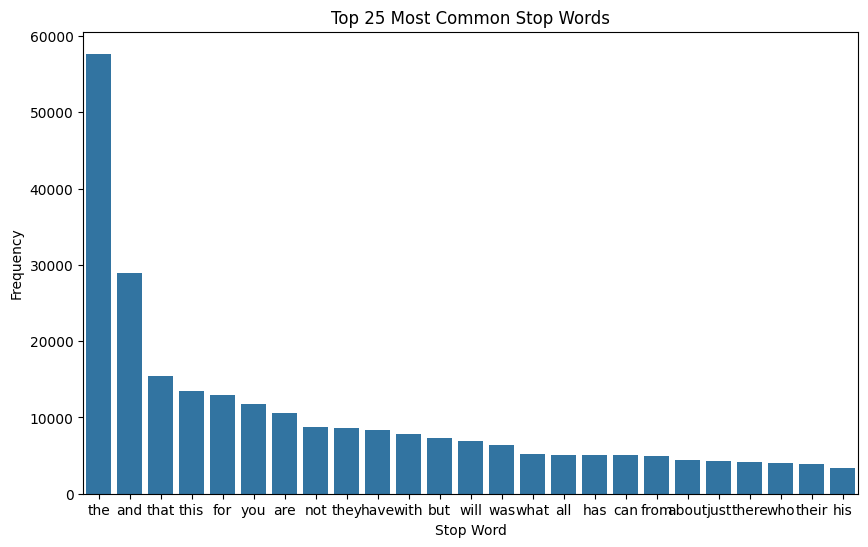

In [ ]:
## create a freq dist of stop words in the clean comment column
from collections import Counter

all_stop_words = [word for comment in data['clean_comment'] for word in comment.split() if word in stop_words]

## count most common stop words
most_common_stop_words = Counter(all_stop_words).most_common(25)

## convert most common words to df for plotting
top_25 = pd.DataFrame(most_common_stop_words, columns=['Stop Word', 'count'])

plt.figure(figsize=(10, 6))
sns.barplot(data=top_25, x='Stop Word', y='count')
plt.title('Top 25 Most Common Stop Words')
plt.xlabel('Stop Word')
plt.ylabel('Frequency')





In [ ]:
data['num_chars'] = data['clean_comment'].apply(len)
data.head()

,clean_comment,category,word_count,num_stopwords,num_chars
0,family mormon have never tried explain them th...,1,39,13,259
1,buddhism has very much lot compatible with chr...,1,196,59,1268
2,seriously don say thing first all they won get...,-1,86,40,459
3,what you have learned yours and only yours wha...,0,29,15,167
4,for your own benefit you may want read living ...,1,112,45,690


In [ ]:
data['num_chars'].describe()

,num_chars
count,36793.000000
mean,183.017694
std,359.770339
min,1.000000
25%,39.000000
50%,81.000000
75%,186.000000
max,8665.000000


In [ ]:
from collections import Counter

## combine all comments into one large string
all_text  = ' '.join(data['clean_comment'])

##count frew of each char
char_freq = Counter(all_text)

char_freq_df = pd.DataFrame(char_freq.items(), columns=['Character', 'Frequency']).sort_values(by='Frequency', ascending=False)

In [ ]:
char_freq_df.head(10)

,Character,Frequency
6,,1091592
12,e,666610
13,t,491287
1,a,481134
3,i,401388
9,n,388465
7,o,379908
17,s,355279
8,r,331425
10,h,296748


In [ ]:
char_freq

Counter({'f': 78866,
         'a': 481134,
         'm': 155561,
         'i': 401388,
         'l': 250104,
         'y': 115420,
         ' ': 1091592,
         'o': 379908,
         'r': 331425,
         'n': 388465,
         'h': 296748,
         'v': 66020,
         'e': 666610,
         't': 491287,
         'd': 221980,
         'x': 9075,
         'p': 135139,
         's': 355279,
         'u': 170377,
         'z': 5725,
         'k': 62531,
         'g': 132927,
         'c': 167821,
         'q': 5136,
         'b': 88199,
         'w': 110522,
         'j': 22906,
         '5': 1631,
         '6': 1403,
         'é': 59,
         '4': 1573,
         '0': 8477,
         '1': 4845,
         'ā': 67,
         'ī': 12,
         'ū': 110,
         'ś': 8,
         '2': 4638,
         '8': 1199,
         '9': 1775,
         '’': 2314,
         '…': 81,
         'ا': 39,
         'ل': 23,
         'ع': 11,
         'ن': 17,
         'ة': 4,
         'ي': 6,
         'ك': 6,
     

In [ ]:
data['num_punctuation_chars'] = data['clean_comment'].apply(
    lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-'])
)
data.sample(5)

,clean_comment,category,word_count,num_stopwords,num_chars,num_punctuation_chars
31450,javier from les miserables javert,0,5,1,33,0
29883,shitty sense humor without any class all,0,7,2,40,0
15089,how pathetic but how predictable,-1,5,3,32,0
36965,just let him fade irrelevance stop giving him ...,1,28,11,164,0
34566,anybody seen malayalam film kammarasambhavam i...,0,21,5,137,0


In [ ]:
data['num_punctuation_chars'].describe()

,num_punctuation_chars
count,36793.000000
mean,0.009948
std,0.718061
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,136.000000


/tmp/ipython-input-2152524600.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_bigrams_df, x='count', y='Bigram', palette ='magma')


Text(0.5, 0, 'Bigram')

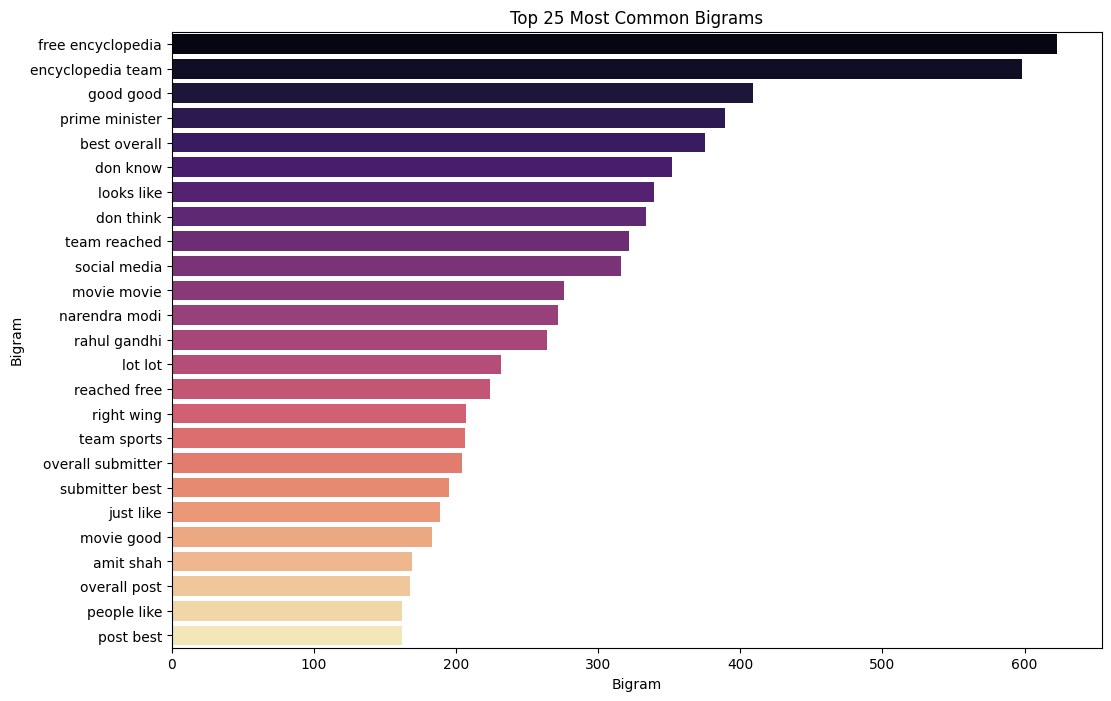

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

#create functino to extract top 25 bigrams
def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

top_25_bigrams = get_top_ngrams(data['clean_comment'], n=25)

#convert to df for plotting
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['Bigram', 'count'])

plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_bigrams_df, x='count', y='Bigram', palette ='magma')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Bigram')


/tmp/ipython-input-2961589873.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_trigrams_df, x='count', y='Trigram', palette ='magma')


Text(0.5, 0, 'Bigram')

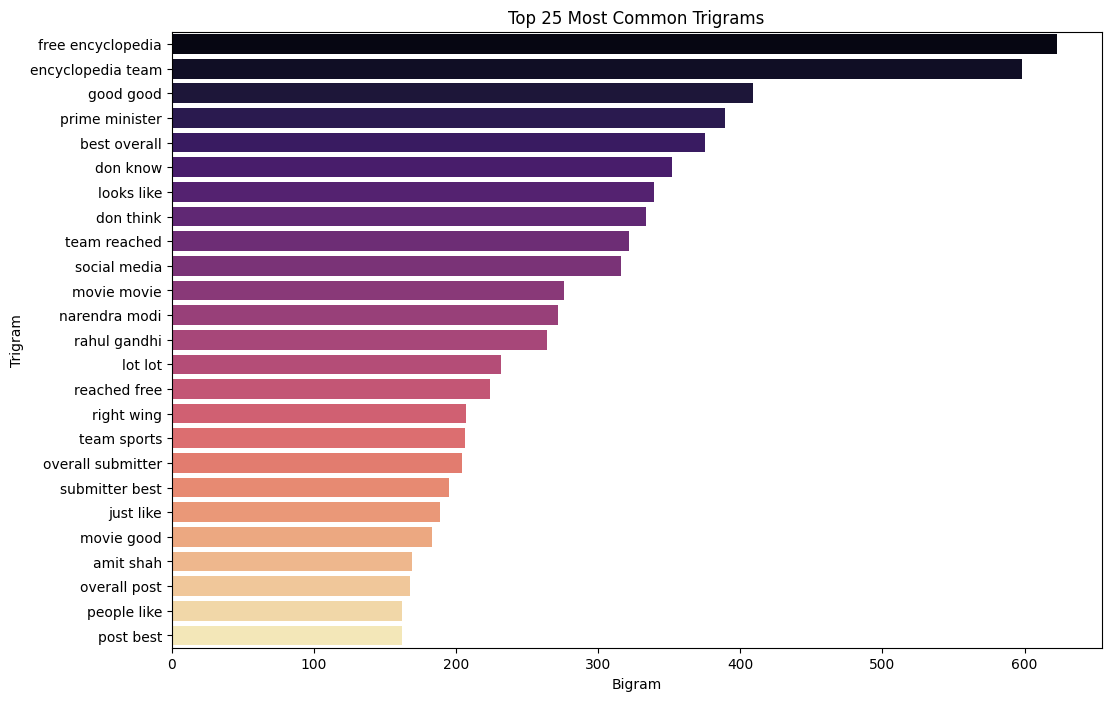

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

#create functino to extract top 25 trigrams
def get_top_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

top_25_trigrams = get_top_ngrams(data['clean_comment'], n=25)

#convert to df for plotting
top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns=['Trigram', 'count'])

plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_trigrams_df, x='count', y='Trigram', palette ='magma')
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Bigram')


In [ ]:

# Remove non-English characters from the 'clean_comment' column
# Keeping only standard English letters, digits, and common punctuation
import re
data['clean_comment'] = data['clean_comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))


In [ ]:
all_text = ' '.join(data['clean_comment'])

char_freq = Counter(all_text)

char_freq_df = pd.DataFrame(char_freq.items(), columns=['Character', 'Frequency']).sort_values(by='Frequency', ascending=False)
char_freq_df


,Character,Frequency
6,,1091592
12,e,666610
13,t,491287
1,a,481134
3,i,401388
9,n,388465
7,o,379908
17,s,355279
8,r,331425
10,h,296748


In [ ]:
data.head()

,clean_comment,category,word_count,num_stopwords,num_chars,num_punctuation_chars
0,family mormon have never tried explain them th...,1,39,13,259,0
1,buddhism has very much lot compatible with chr...,1,196,59,1268,0
2,seriously don say thing first all they won get...,-1,86,40,459,0
3,what you have learned yours and only yours wha...,0,29,15,167,0
4,for your own benefit you may want read living ...,1,112,45,690,0


In [ ]:
from nltk.corpus import stopwords

## define stop words but keep essential ones
stop_words = set(stopwords.words('english')) - {'not','but', 'however', 'no', 'yet'}

data['clean_comment'] = data['clean_comment'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
    )

In [ ]:
data.head()

,clean_comment,category,word_count,num_stopwords,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


In [ ]:

from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# Define the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'clean_comment_no_stopwords' column
data['clean_comment'] = data['clean_comment'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

data.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,clean_comment,category,word_count,num_stopwords,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


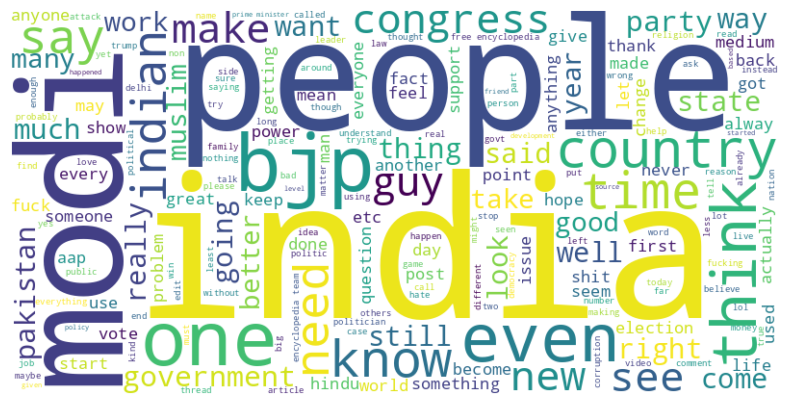

In [ ]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(data['clean_comment'])

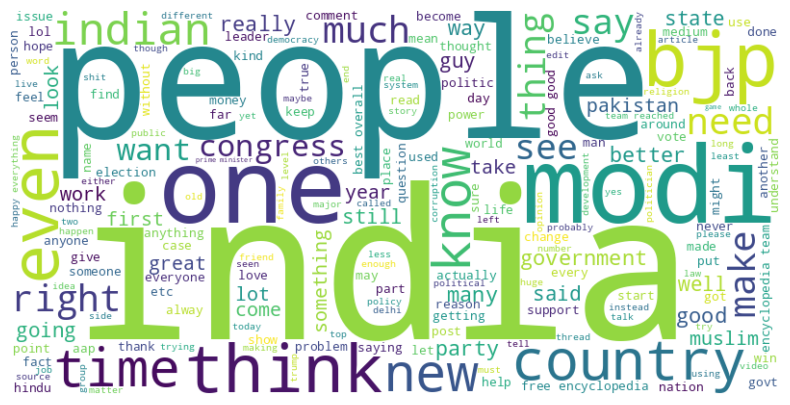

In [ ]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

plot_word_cloud(data[data['category'] == 1]['clean_comment'])

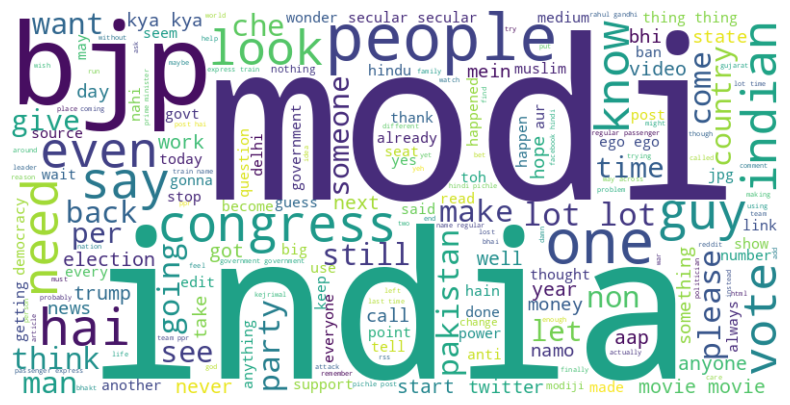

In [ ]:
plot_word_cloud(data[data['category'] == 0]['clean_comment'])

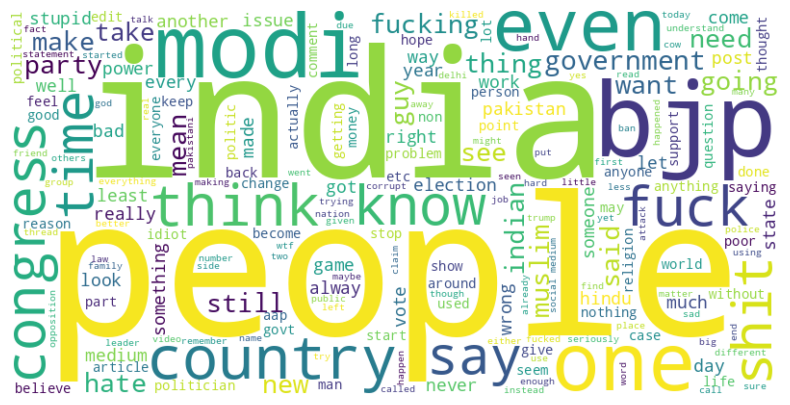

In [ ]:
plot_word_cloud(data[data['category'] == -1]['clean_comment'])


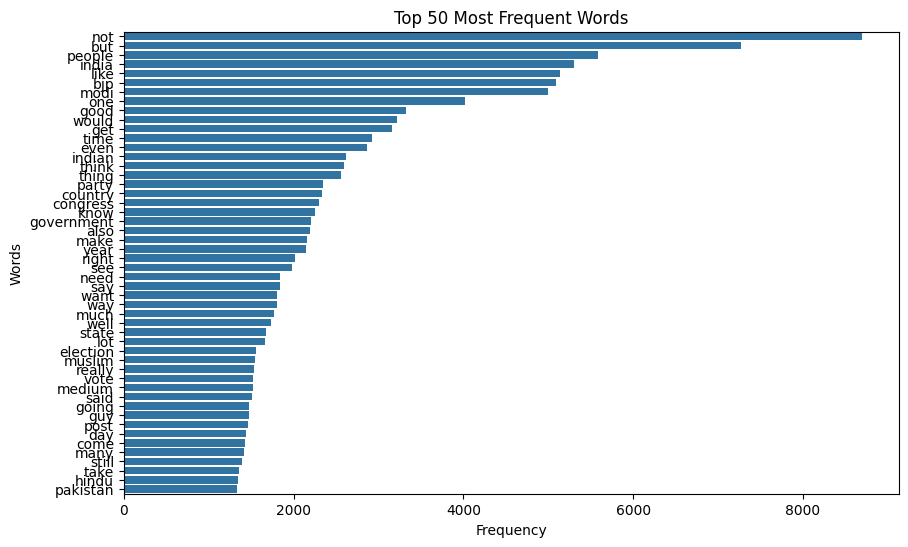

In [ ]:


def plot_top_n_words(df, n=20):
    """Plot the top N most frequent words in the dataset."""
    # Flatten all words in the content column
    words = ' '.join(df['clean_comment']).split()

    # Get the top N most common words
    counter = Counter(words)
    most_common_words = counter.most_common(n)

    # Split the words and their counts for plotting
    words, counts = zip(*most_common_words)

    # Plot the top N words
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Example usage
plot_top_n_words(data, n=50)

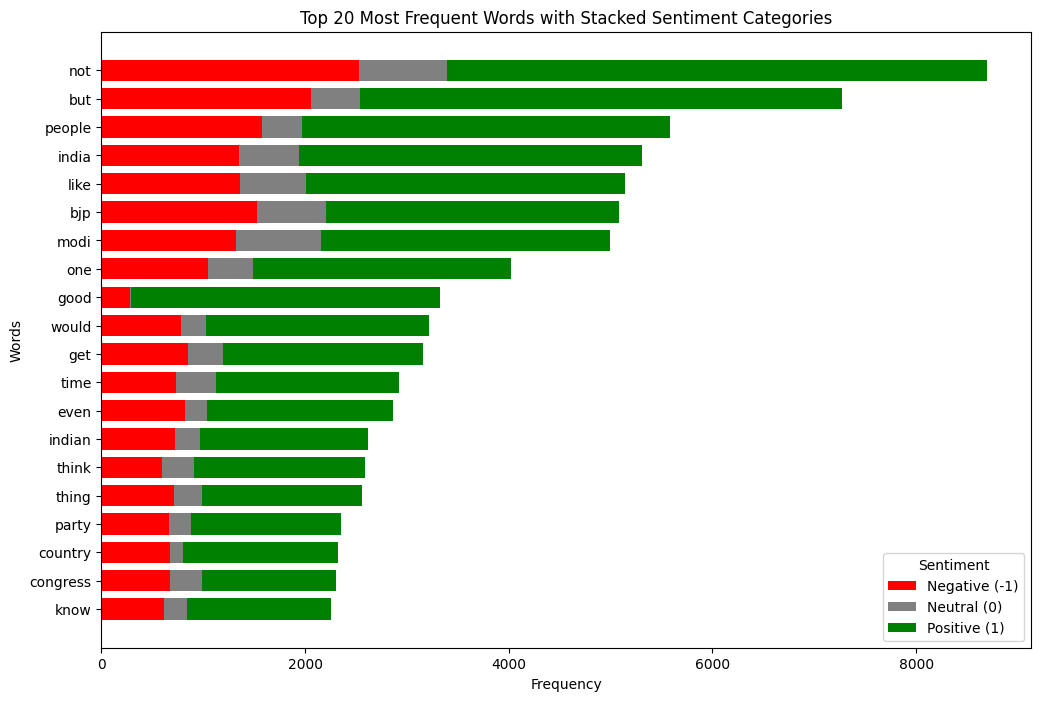

In [ ]:
def plot_top_n_words_by_category(df, n=20, start=0):
    """Plot the top N most frequent words in the dataset with stacked hue based on sentiment category."""
    # Flatten all words in the content column and count their occurrences by category
    word_category_counts = {}

    for idx, row in df.iterrows():
        words = row['clean_comment'].split()
        category = row['category']  # Assuming 'category' column exists for -1, 0, 1 labels

        for word in words:
            if word not in word_category_counts:
                word_category_counts[word] = { -1: 0, 0: 0, 1: 0 }  # Initialize counts for each sentiment category

            # Increment the count for the corresponding sentiment category
            word_category_counts[word][category] += 1

    # Get total counts across all categories for each word
    total_word_counts = {word: sum(counts.values()) for word, counts in word_category_counts.items()}

    # Get the top N most frequent words across all categories
    most_common_words = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)[start:start+n]
    top_words = [word for word, _ in most_common_words]

    # Prepare data for plotting
    word_labels = top_words
    negative_counts = [word_category_counts[word][-1] for word in top_words]
    neutral_counts = [word_category_counts[word][0] for word in top_words]
    positive_counts = [word_category_counts[word][1] for word in top_words]

    # Plot the stacked bar chart
    plt.figure(figsize=(12, 8))
    bar_width = 0.75

    # Plot negative, neutral, and positive counts in a stacked manner
    plt.barh(word_labels, negative_counts, color='red', label='Negative (-1)', height=bar_width)
    plt.barh(word_labels, neutral_counts, left=negative_counts, color='gray', label='Neutral (0)', height=bar_width)
    plt.barh(word_labels, positive_counts, left=[i+j for i,j in zip(negative_counts, neutral_counts)], color='green', label='Positive (1)', height=bar_width)

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Most Frequent Words with Stacked Sentiment Categories')
    plt.legend(title='Sentiment', loc='lower right')
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency at the top
    plt.show()



plot_top_n_words_by_category(data, n=20)
